In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
data=pd.read_csv('ex1data2.txt')

In [19]:
data.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [20]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#now X and Y are list types
#normalizing data to ensure no bias
x[:,0:2]=x[:,0:2]/np.max(x[:,0:2])
y=y/np.max(y)

In [21]:
#now setting parameters for linear regression
m=len(x);
X=np.column_stack([np.ones((m,1)),x])
Y=y
theta=np.zeros((X.shape[1],))
niter=1500
alpha=0.1

In [22]:
def cost_func(X,Y,theta):
    m=len(X)
    a=np.dot(X,theta)-Y
    return (np.dot(a,a.T)/(2*m))

In [23]:
def Gradient_descent(X,Y,theta,alpha,niter):
    m=len(x)
    J=np.zeros((niter,1))
    for i in range(niter):
        for j in range(len(theta)):
            theta[j]=theta[j] - (alpha/m) * np.dot((np.dot(X,theta)-y),X[:,j])
        J[i]=cost_func(X,Y,theta)
      
    return(theta,J)
        

In [24]:
[theta,J]=Gradient_descent(X,Y,theta,alpha,niter)

In [25]:
theta

array([ 0.47354267,  0.50567586,  0.        ])

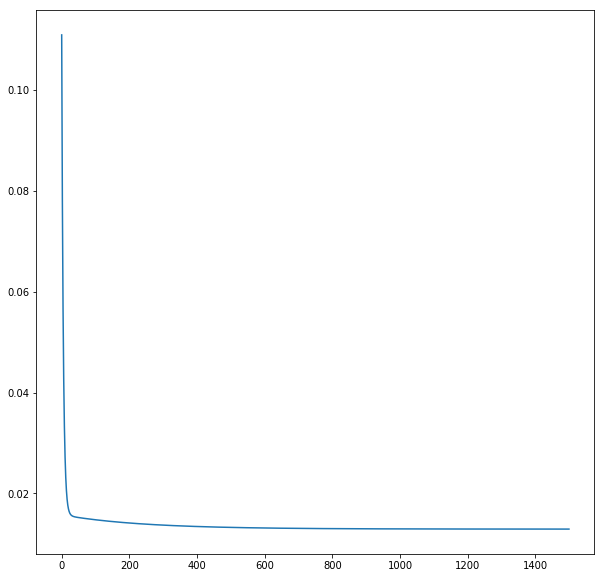

In [26]:
plt.figure(figsize=(10,10))
plt.plot(J)

In [27]:
predict1 = np.dot([1,1650,3],theta);
print("Predicted price of a 1650 sq-ft, 3 br house {}".format(predict1*10000))

Predicted price of a 1650 sq-ft, 3 br house 8348387.159114227


In [28]:
from sklearn.linear_model import LinearRegression 

In [29]:
lm=LinearRegression()

In [30]:
lm.fit(x,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
X1=np.reshape([1650,3],(1,2))
print("using sklearn inbulit function to predict house price\n")
print("Predicted price of a 1650 sq-ft, 3 br house {}\n".format(lm.predict(X1*10000)))


using sklearn inbulit function to predict house price

Predicted price of a 1650 sq-ft, 3 br house [ 8694335.61618628]



In [32]:
print(lm.intercept_)
print('\n')
print(theta[0])


0.473070597387


0.473542665767
